In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import plotly.express as px
data = pd.read_excel("//content/An Analysis of Unemployment in Republic of India.xlsx")
print(data.head())

              Age Gender     Period  Unemployed
0  16 to 19 years    Men 2005-01-01       91000
1  20 to 24 years    Men 2005-01-01      175000
2  25 to 34 years    Men 2005-01-01      194000
3  35 to 44 years    Men 2005-01-01      201000
4  45 to 54 years    Men 2005-01-01      207000


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708 entries, 0 to 1707
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Age         1708 non-null   object        
 1   Gender      1708 non-null   object        
 2   Period      1708 non-null   datetime64[ns]
 3   Unemployed  1708 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 53.5+ KB


In [3]:
data.tail()

,Age,Gender,Period,Unemployed
1703,25 to 34 years,Women,2015-02-01,294000
1704,35 to 44 years,Women,2015-02-01,235000
1705,45 to 54 years,Women,2015-02-01,253000
1706,55 to 64 years,Women,2015-02-01,170000
1707,65 years and over,Women,2015-02-01,174000


In [4]:
data.sample()

,Age,Gender,Period,Unemployed
742,16 to 19 years,Men,2009-06-01,207000


In [5]:
data.dtypes

Age                   object
Gender                object
Period        datetime64[ns]
Unemployed             int64
dtype: object

In [6]:
data.describe()

,Unemployed
count,1.708000e+03
mean,2.578823e+05
std,1.970603e+05
min,9.000000e+03
25%,1.060000e+05
50%,1.800000e+05
75%,3.860000e+05
max,1.011000e+06


In [7]:
data.isnull().sum()

Age           0
Gender        0
Period        0
Unemployed    0
dtype: int64

In [8]:
data.shape

(1708, 4)

<ipython-input-9-b129419f43bb>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plot.style.use('seaborn-whitegrid')
<ipython-input-9-b129419f43bb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


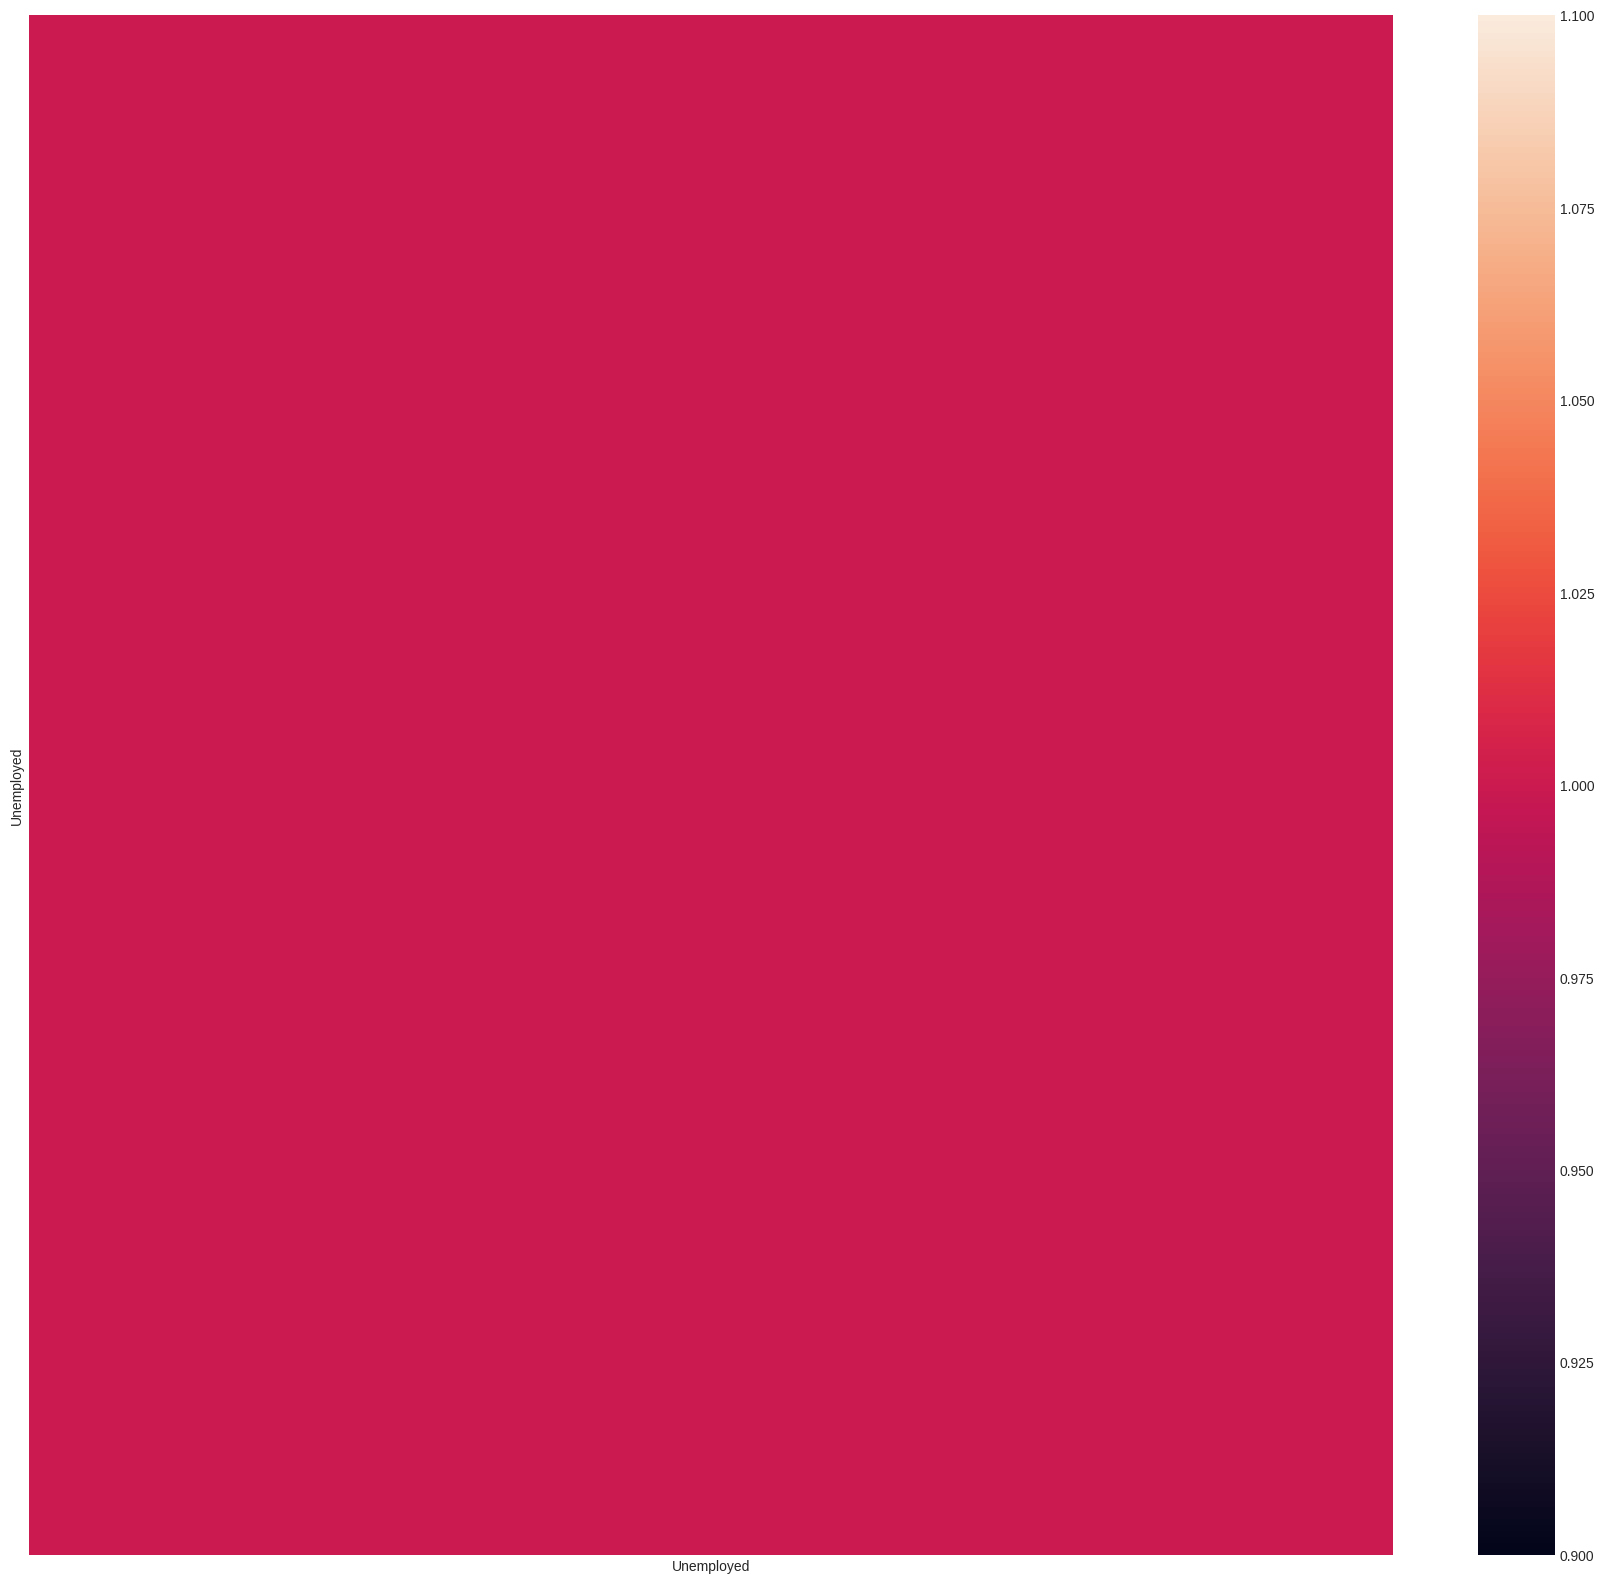

In [9]:
plot.style.use('seaborn-whitegrid')
plot.figure(figsize=(22, 20))
sns.heatmap(data.corr())
plot.show()

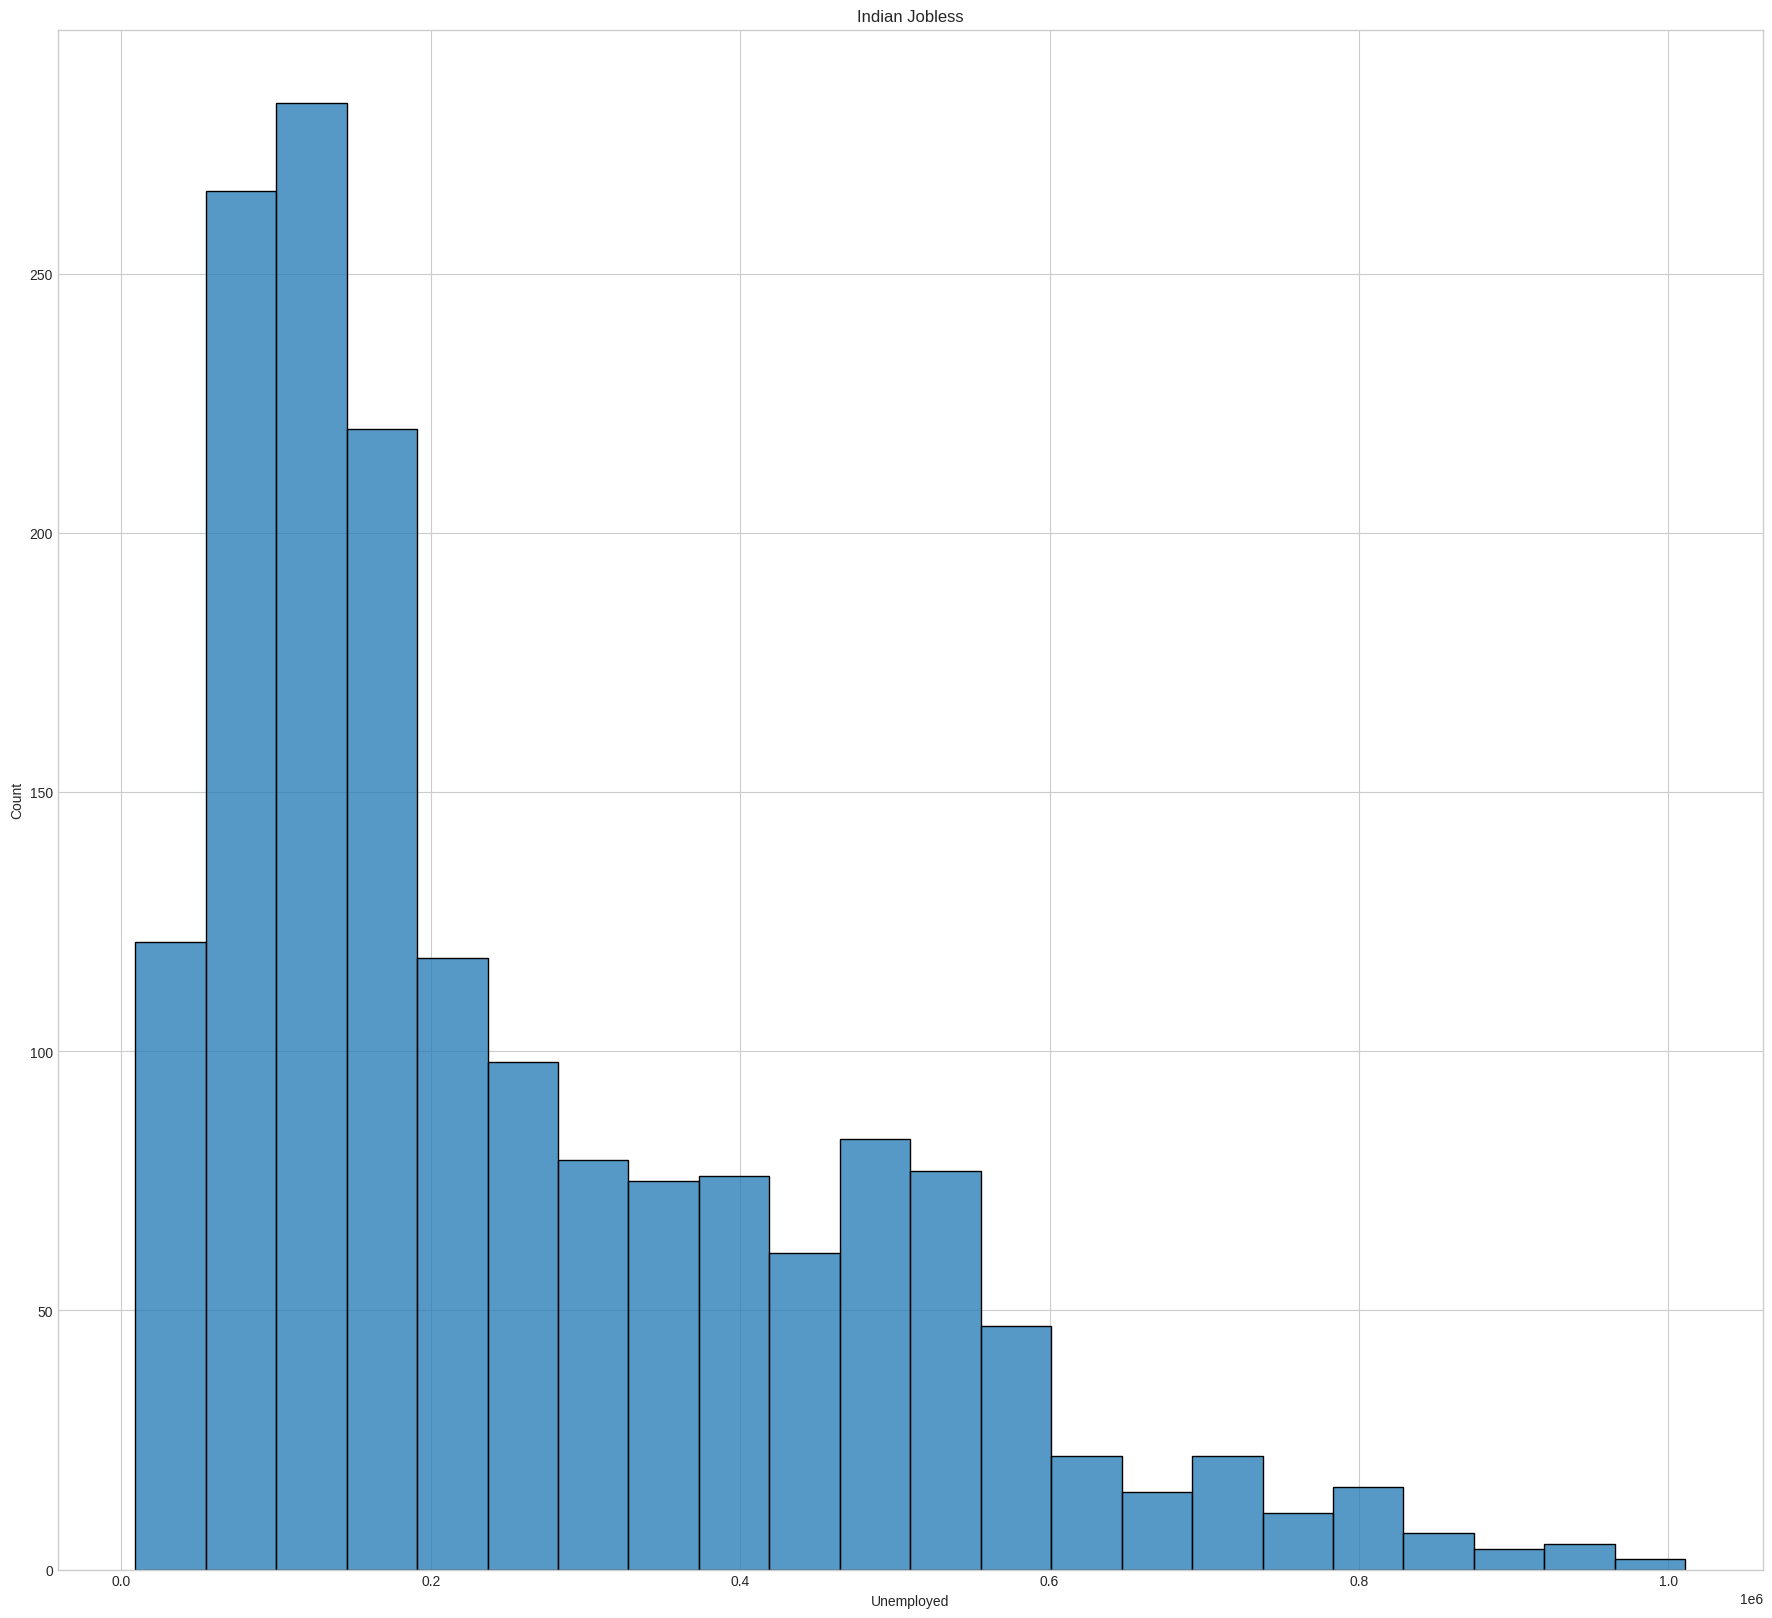

In [10]:
plot.figure(figsize=(22, 20))
plot.title("Indian Jobless")
sns.histplot(x="Unemployed", data=data)
plot.show()

<Axes: >

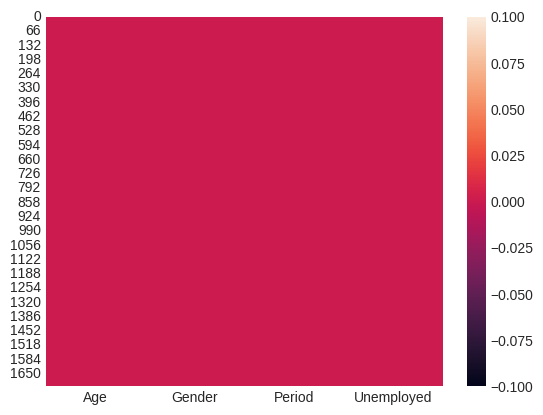

In [11]:
sns.heatmap(data.isnull(),cbar=True)

In [12]:
import plotly.express as px
import ipywidgets as widgets

In [13]:
import calendar

import datetime as dt

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

In [14]:
data.shape

(1708, 4)

In [15]:
data['Period'] = pd.to_datetime(data['Period'],dayfirst=True)

In [16]:
data['Gender']= data['Gender'].astype('category')

In [17]:
data['Month'] =  data['Period'].dt.month

In [18]:
data['MonthNumber'] = data['Month'].apply(lambda x : int(x))

In [19]:
data['MonthName'] =  data['MonthNumber'].apply(lambda x: calendar.month_abbr[x])

In [20]:
data['Age'] = data['Age'].astype('category')

In [21]:
data.describe()

,Unemployed,Month,MonthNumber
count,1.708000e+03,1708.000000,1708.000000
mean,2.578823e+05,6.418033,6.418033
std,1.970603e+05,3.483623,3.483623
min,9.000000e+03,1.000000,1.000000
25%,1.060000e+05,3.000000,3.000000
50%,1.800000e+05,6.000000,6.000000
75%,3.860000e+05,9.000000,9.000000
max,1.011000e+06,12.000000,12.000000


<ipython-input-22-74933ca89b37>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatMap = heatMap.corr()


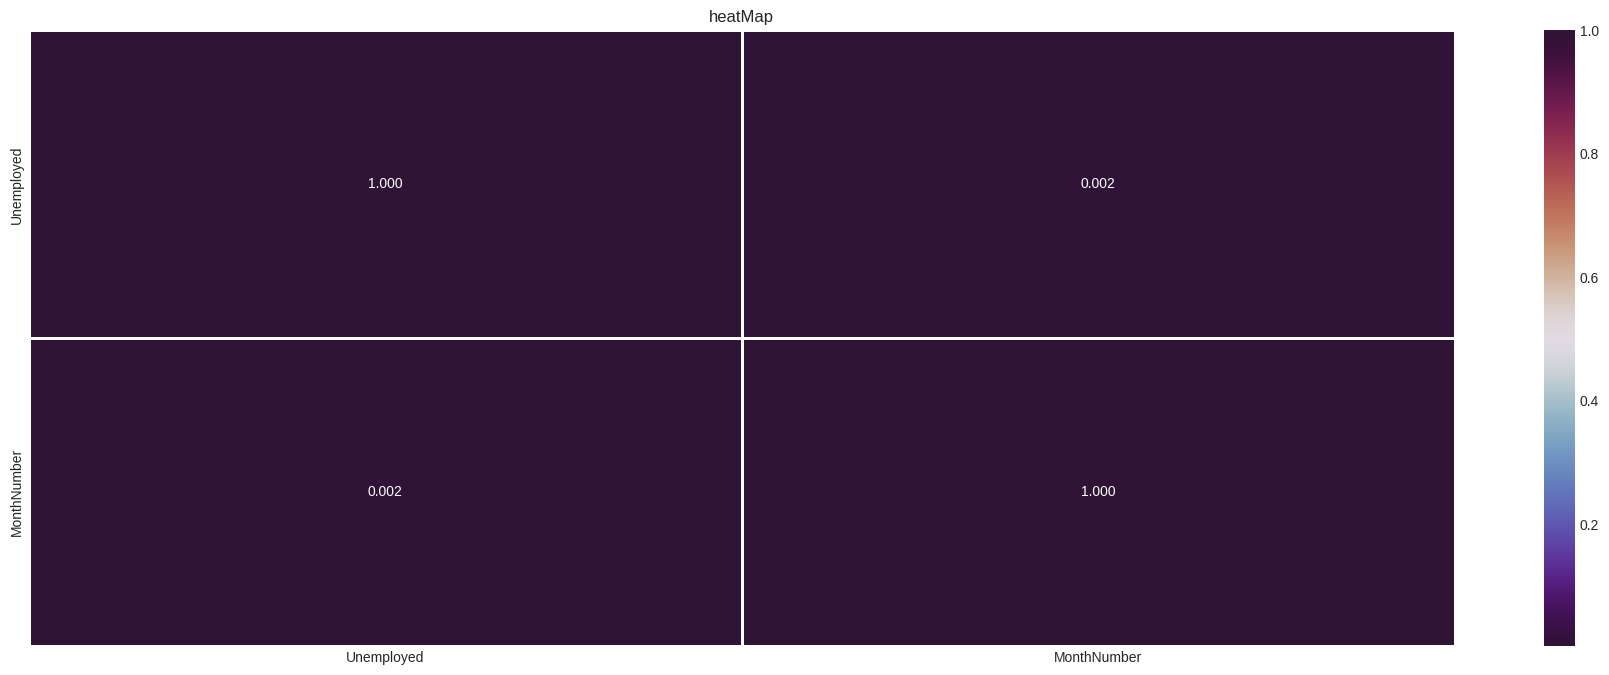

In [22]:
heatMap = data[['Age','Period','Gender', 'Unemployed', 'MonthNumber']]

#constructing on heatMap with correlation values
heatMap = heatMap.corr()

#plotting the figure
plot.figure(figsize=(23,8))
sns.heatmap(heatMap, annot=True,cmap='twilight_shifted', fmt='.3f', linewidths=1)
plot.title('heatMap')
plot.show()

In [23]:
fig = px.box(
    data,
    x='Age',
    y='Unemployed',
    color='Age',
    title='Unemployment rate',
    template='plotly'
)
fig.show()

In [24]:
fig = px.scatter_matrix(data,
    dimensions=['Age','Period',
                'MonthNumber'],
    color='Age')
fig.show()

In [25]:
fig = px.bar(data,
             x='Age',
             y='Unemployed',
             animation_frame = 'MonthName',
             color='Age',
             title='Age-wise Unemployment Rate',
             height=800)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500

fig.show()